In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
import pandas as pd
train_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [41]:
train_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [42]:
train_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [43]:
train_data.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [44]:
train_data.shape

(23097, 18)

In [45]:
# check for missing values
train_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [46]:
# imputation
def mode(data,columns):
    for col in columns:
        mode = data[col].mode()
        if mode.empty:

    
            data = data[col].fillna(data[col].mode(0),inplace=True)
        else:
            data[col].fillna(mode[0], inplace=True)
    return data

    

    
mode(train_data,train_data[['A','B','C','D','E','F','Z','Treated_with_drugs','Number_of_prev_cond']])

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [47]:
train_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [48]:
# target variable
train_data.Survived_1_year.value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

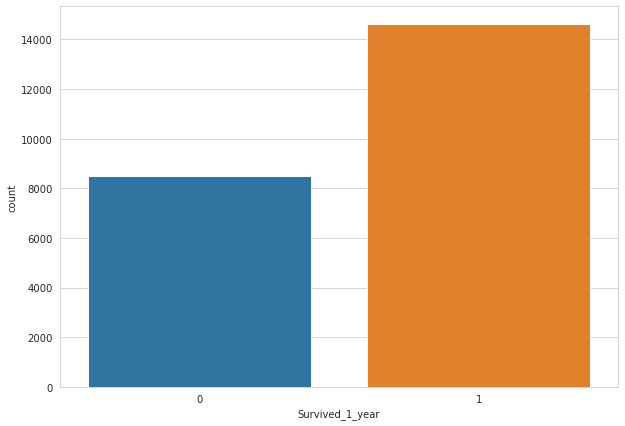

In [49]:
#distribution of target column
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot(x='Survived_1_year',data=train_data)
plt.show()

<AxesSubplot:>

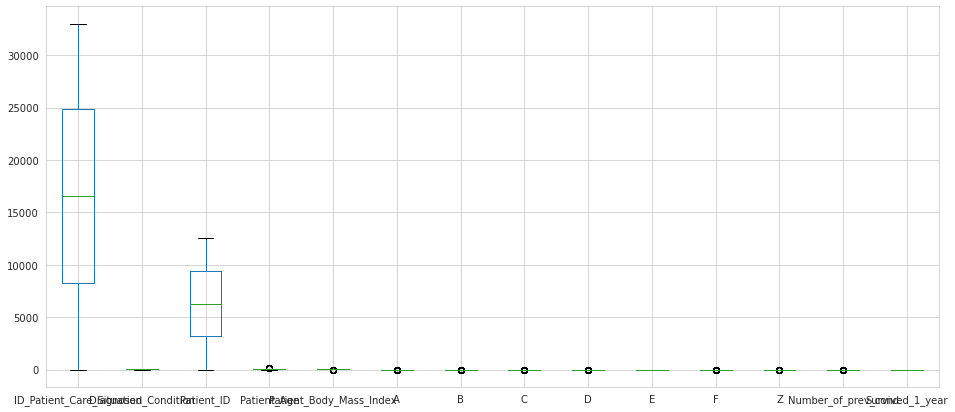

In [50]:
plt.figure(figsize=(16,7))
train_data.boxplot()

In [51]:
# outliers in age
train_data = train_data[train_data['Patient_Age'] < 100]
train_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.000000,23084.0,23084.000000,23084.000000
mean,16536.441518,26.428002,6257.762693,33.156862,23.467172,0.903873,0.129137,0.175273,0.079189,0.372422,0.050858,0.0,1.710752,0.632040
std,9526.936580,15.022018,3593.944948,19.425696,3.772969,0.294772,0.335359,0.380209,0.270039,0.483461,0.219712,0.0,0.768248,0.482261
min,2.000000,1.000000,1.000000,0.000000,17.000336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
25%,8274.000000,13.000000,3179.000000,16.000000,20.209666,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,16590.000000,26.000000,6238.000000,33.000000,23.387824,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,1.000000
75%,24810.250000,39.000000,9358.250000,50.000000,26.788780,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000,1.000000
max,32982.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000,1.000000


In [52]:
#checking for duplicates
train_data.duplicated().nunique()

1

In [53]:
###Checking relation between features and target variable

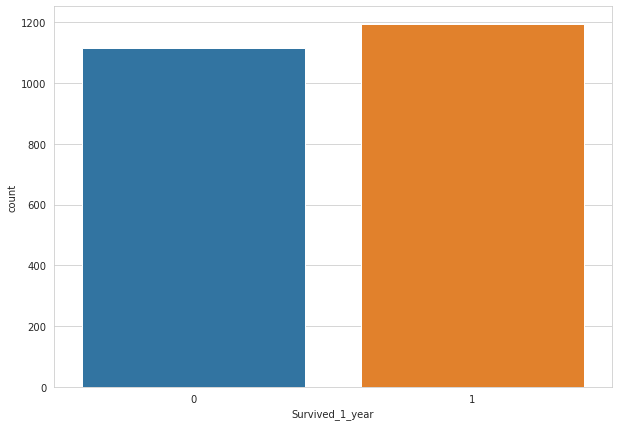

In [54]:
#checking survival

low_bmi = train_data[train_data['Patient_Body_Mass_Index'] <train_data['Patient_Body_Mass_Index'].quantile(0.1)  ]

plt.figure(figsize=(10,7))
sns.countplot(data=low_bmi,x=low_bmi['Survived_1_year'])
plt.show()

<AxesSubplot:xlabel='Survived_1_year', ylabel='Number_of_prev_cond'>

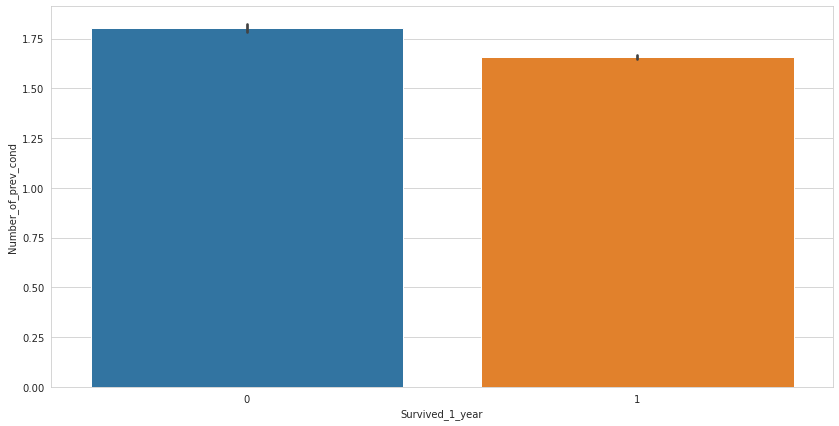

In [55]:
# survival rate with previous conditions
plt.figure(figsize=(14,7))
sns.barplot(x='Survived_1_year', y='Number_of_prev_cond', data=train_data)

<AxesSubplot:xlabel='Patient_Rural_Urban', ylabel='count'>

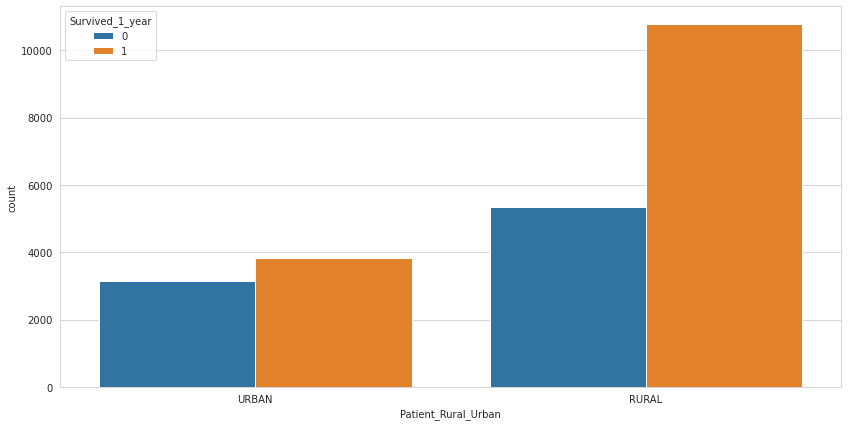

In [56]:
#rural and urban
plt.figure(figsize=(14,7))
sns.countplot(train_data['Patient_Rural_Urban'],hue=train_data['Survived_1_year'],data=train_data)

<AxesSubplot:xlabel='Patient_Smoker', ylabel='count'>

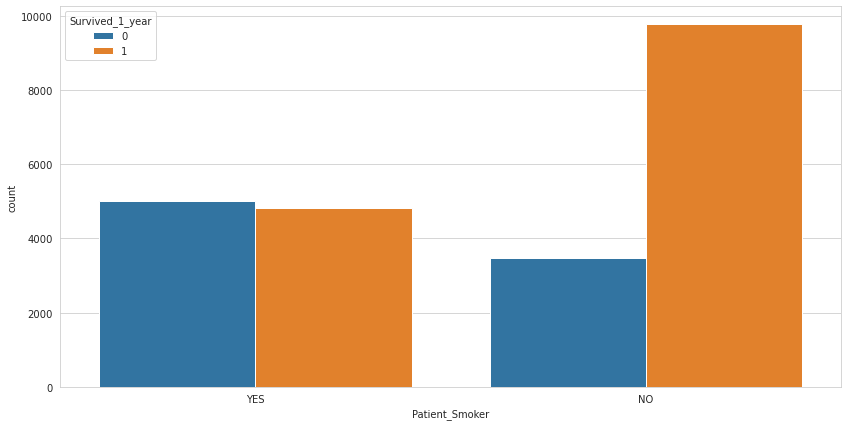

In [57]:
#patient smoker
plt.figure(figsize=(14,7))
sns.countplot(train_data['Patient_Smoker'],hue=train_data['Survived_1_year'],data=train_data)

In [58]:
#Label encoding for the categorical to numerical
le = LabelEncoder()

In [59]:
[x for x in train_data.columns if train_data[x].dtype == 'object']

['Treated_with_drugs',
 'Patient_Smoker',
 'Patient_Rural_Urban',
 'Patient_mental_condition']

In [60]:
train_data['Treated_with_drugs'] = le.fit_transform(train_data['Treated_with_drugs']) 
train_data['Patient_Smoker'] = le.fit_transform(train_data['Patient_Smoker'])  
train_data['Patient_mental_condition'] = le.fit_transform(train_data['Patient_mental_condition'])  
train_data['Patient_Rural_Urban'] = le.fit_transform(train_data['Patient_Rural_Urban'])  

train_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,31,56,18.479385,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,16,36,22.945566,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,31,48,27.510027,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,0,5,19.130976,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,31,47,26.155120,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,21,14,18.643448,0,0,0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,31,55,23.684585,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,31,63,27.500039,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,24,25,23.719125,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [61]:
#cretating instances of x and y columns
x = train_data.drop(columns=['Patient_ID','Patient_mental_condition','Survived_1_year'])
y = train_data['Survived_1_year']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=49,test_size=0.3)

Text(0.5, 1.0, 'Target column distribution(Survived_1_year)')

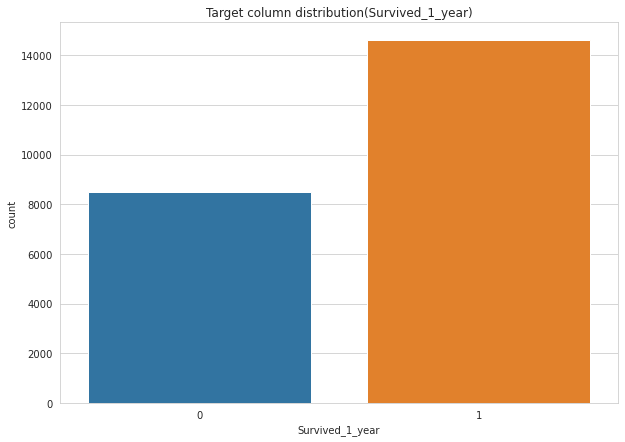

In [62]:
#balancing the target column
plt.figure(figsize=(10,7))
sns.countplot(train_data['Survived_1_year'],data=train_data)
plt.title('Target column distribution(Survived_1_year)')

In [63]:
#oversampling the 0 in the survived column
ros =  RandomOverSampler()
x_resampled, y_resampled = ros.fit_resample(x_train,y_train)

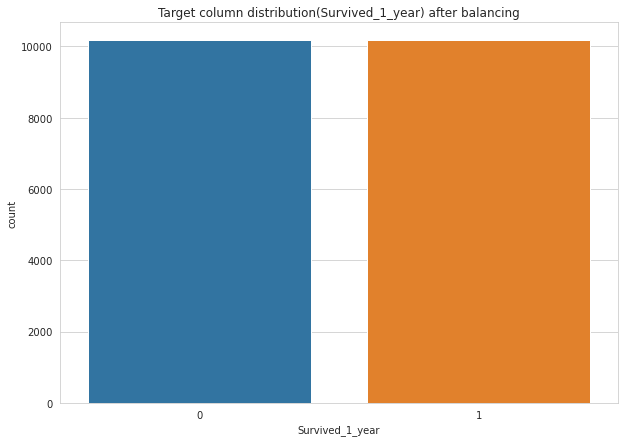

In [64]:
plt.figure(figsize=(10,7))
sns.countplot(y_resampled,data=train_data)
plt.title('Target column distribution(Survived_1_year) after balancing')
plt.show()

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=30)
rfc.fit(x_resampled,y_resampled)
rfc_pred = rfc.predict(x_test)

In [66]:
rfc_pred

array([0, 0, 1, ..., 0, 0, 1])

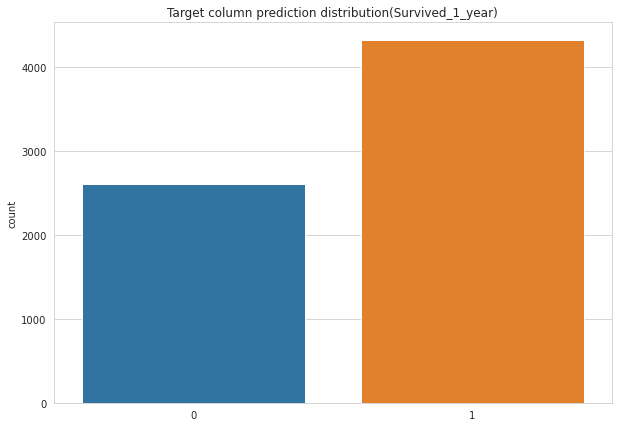

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(rfc_pred)
plt.title('Target column prediction distribution(Survived_1_year)')
plt.show()

In [68]:
accuracy = accuracy_score(y_test,rfc_pred)
accuracy

0.8176436615651169

In [69]:
from sklearn.metrics import classification_report

classification_report(y_test,rfc_pred)

'              precision    recall  f1-score   support\n\n           0       0.74      0.77      0.75      2504\n           1       0.87      0.85      0.86      4422\n\n    accuracy                           0.82      6926\n   macro avg       0.80      0.81      0.80      6926\nweighted avg       0.82      0.82      0.82      6926\n'

In [70]:
# prediction using test data
test_data['Treated_with_drugs'] = le.fit_transform(test_data['Treated_with_drugs']) 
test_data['Patient_Smoker'] = le.fit_transform(test_data['Patient_Smoker'])  
test_data['Patient_mental_condition'] = le.fit_transform(test_data['Patient_mental_condition'])  
test_data['Patient_Rural_Urban'] = le.fit_transform(test_data['Patient_Rural_Urban'])  
test_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,24,16,29.443894,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,31,24,26.836321,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,29,63,25.523280,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,31,42,27.171155,0,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,24,50,25.556192,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,18245,11,9299,31,28,29.106314,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
9299,15598,7,6273,0,4,20.616673,0,1,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
9300,11885,16,11473,11,20,24.727357,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,25101,50,5681,28,33,17.517426,0,1,0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0


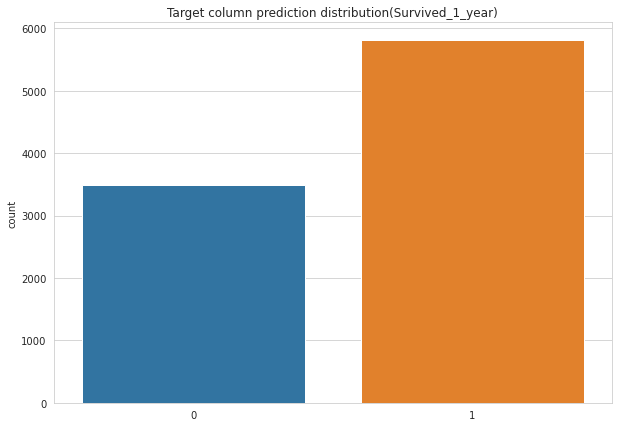

In [71]:
test_data = test_data.drop(columns=['Patient_ID','Patient_mental_condition'])
test_pred = rfc.predict(test_data)

#visualization
plt.figure(figsize=(10,7))
sns.countplot(test_pred)
plt.title('Target column prediction distribution(Survived_1_year)')
plt.show()

In [72]:
test_pred =  pd.DataFrame(test_pred)
test_pred.rename({0: 'prediction'}, axis=1, inplace=True)
submission_file =(test_pred.to_csv('submission_file.csv',index=False))
test_pred

,prediction
0,1
1,1
2,1
3,0
4,1
...,...
9298,0
9299,1
9300,1
9301,0
